<h1>Trabalho Prático I - Disciplina SME0104<br>
Autora: Ana Cristina Silva de Oliveira, NUSP: 11965630; 16/05/2023</h1>


**SISTEMAS LINEARES COM MATRIZES SIMÉTICAS**


<br><br>

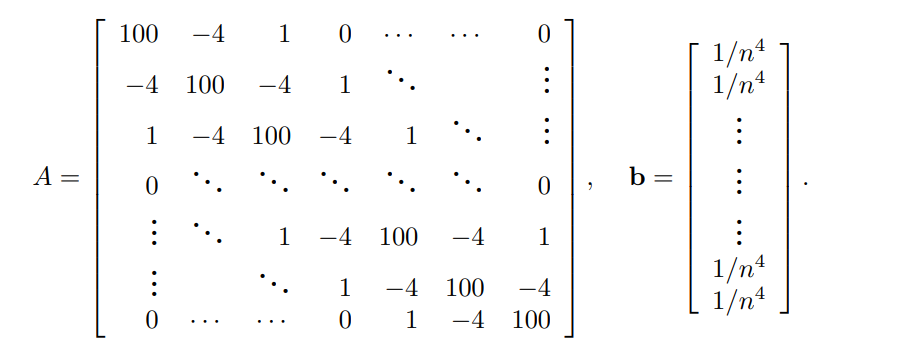

**A)** Escreva um código que monte a matriz A para n = 1000.<br>


A matriz apresentada acima é um exemplo de matriz de banda. Em uma matriz de banda, existem valores p e q, onde p > 1, q < n, que determinam a presença de zeros em certas posições. Para essa matriz, temos que<br> <center> Aij = 0 se i > j + p ou j > i + q</center><br> e a largura da banda é dada por <center>p + q + 1</center>

No caso específico da matriz ser pentadiagonal, o valor de p e q é igual a 2, indicando duas diagonais acima e duas diagonais abaixo da diagonal principal com elementos não nulos. Portanto, a largura da banda para essa matriz é igual a 5.



In [193]:
import numpy as np

In [194]:
'''
O método abaixo constrói uma matriz de banda do tipo pentadiagonal.

Recebe como parâmetros:
n: dimensão da matriz

Retorno:
matrix: matriz de banda pentadiagonal
'''
n = 1000

def buildBandPentadiagonalMatrix(n):
    mainDiagonalValue = 100 # Valor da diagonal principal
    secondaryDiagonalValue = -4 # valor da diagonal secundária
    tertiaryDiagonalValue = 1 # Valor da diagonal terciária
    bandWidth = 5 # Largura da banda
    distanceTwoDiagonalsFromMainDiagonal = 2 
    distanceOneDiagonalsFromMainDiagonal = 1
    
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(max(0, i - bandWidth), min(n, i + bandWidth + 1)):
            # Aij recebe o valor corresponde a diagonal principal
            if i == j: 
                matrix[i, j] = mainDiagonalValue

            # Aij recebe o valor corresponde a diagonal secundária se estiver a uma distancia da diagonal principal
            elif abs(i - j) == distanceOneDiagonalsFromMainDiagonal:
                matrix[i, j] = secondaryDiagonalValue

            # Aij recebe o valor corresponde a diagonal terciária se estiver a duas distancias da diagonal principal
            elif abs(i - j) == distanceTwoDiagonalsFromMainDiagonal:
                matrix[i, j] = tertiaryDiagonalValue
                
    return matrix

In [195]:
bandMatrix = buildBandPentadiagonalMatrix(n)

# impressão dos primeiros elementos da matriz
print(bandMatrix[:4, :4])

[[100.  -4.   1.   0.]
 [ -4. 100.  -4.   1.]
 [  1.  -4. 100.  -4.]
 [  0.   1.  -4. 100.]]


**B)** Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

In [196]:
import math
import time
startTimeCholesky = 0
endTimeCholesky = 0

In [197]:
''' O método abaixo simplifica os cálculos da decomposição LU significativamente, levando em 
conta a simetria.
Recebe como parâmetros:
A: matriz simétrica e positiva definida
Retorno:
H: matriz triangular inferior (L)
'''
def cholesky(A):
    n = np.shape(A)[0]
    H = np.tril(A)

    for k in range(n-1):
        H[k][k] = math.sqrt(H[k][k])
        H[k+1:n,k] = H[k+1:n,k] / H[k][k]
        for j in range(k+1,n):
            H[j:n,j] = H[j:n,j] - H[j:n,k] * H[j,k]
    H[n-1][n-1] = math.sqrt(H[n-1][n-1])
    
    return H

**C)** Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax = b.

In [198]:
def regressiveReplacement(U,b):
    n = len(U)
    x = n * [0]

    for i in range(n-1,-1,-1):
        S = 0
        for j in range(i+1,n):
            S = S + U[i][j] * x[j]
        x[i] = (b[i] - S)/U[i][i]

    return x

In [199]:
def progressiveReplacement(L,b):
    n = len(L)
    y = n * [0]
    for i in range(n):
        S = 0
        for j in range(0,i):
            S = S + L[i][j] * y[j]
        y[i] = (b[i] - S)/L[i][i]
    return y

In [200]:
'''
O método de resolução do sistema Ax = b, é baseado em:
1. Utilizando a decomposição de Cholesky, obtemos a matriz triangular inferior L.
2. Realizamos substituições progressivas para calcular o vetor y, utilizando L e b 
    como parâmetros.
3. Calculamos a matriz U como a transposta de L.
4. Realizamos substituições regressivas para calcular o vetor x, 
    utilizando U e y como parâmetros.
5. Multiplicamos a matriz A pelo vetor x para obter o vetor Ax.
6. Calculamos o erro residual subtraindo o vetor b do vetor Ax.

O erro residual é uma medida da precisão da solução encontrada. 
Quanto mais próximo de zero o erro, mais precisa é a solução. 
Um erro maior indica uma maior discrepância entre o lado esquerdo (Ax) e o 
lado direito (b) do sistema. No caso apresentado, o erro residual é próximo de zero, 
o que indica uma solução precisa.
'''
startTimeCholesky = time.time()
L = cholesky(bandMatrix)
endTimeCholesky = time.time()

b = np.array([1/n**4]*n)
y = progressiveReplacement(L, b)
U = L.T
x = regressiveReplacement(U,y)

Ax = bandMatrix@x
residualError = b - Ax
print("Erro:\n", np.linalg.norm(residualError))


Erro:
 6.402114392106387e-27


**D)** Escreva um código implementando o método de Jacobi para resolver um sistema Ax = b. Utilize o erro absoluto como critério de parada.

In [201]:
import numpy as np

startTimeJacobi = 0
endTimeJacobi = 0

In [202]:
'''
O método abaixo é um algoritmo iterativo que resolve equações de sistemas lineares.
Parametros:
A: matriz de coeficientes
b: vetor de constantes
x0: vetor com valores iniciais
tol: condição de convergência baseada na norma residual do sistema

Retorno:
x0: solução aproximada do sistema de equação linear
k: número de iterações realizadas
'''

def gaussJacobi(A, b, x0, tol):
    n = np.shape(A)[0]
    D = np.diag(np.diag(A))
    C = np.eye(n) - np.linalg.solve(D,A)
    g = np.linalg.solve(D,b)

    kmax = 10000
    k = 0
    x1 = np.array([np.inf]*n)
    # Condição de convergência
    while (np.linalg.norm(x1 - x0) > tol) and k < kmax:
        k += 1
        x1 = x0
        x0 = C@x0 + g
    
    if k == kmax:
        print("Erro: O método não converge")
        return

    return x0, k

In [203]:
b = np.array([1/n**4]*n)
x0 = np.zeros(n)
x, iterations = gaussJacobi(bandMatrix, b, x0, 0.00000001)

Ax = bandMatrix@x
error = b - Ax
print("Erro:\n", np.linalg.norm(error))

Erro:
 1.8966285877841282e-12


**E)** Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo. Observe quanto tempo leva para resolver o sistema usando Cholesky. Quantas iterações foram necessárias no método de Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky?

In [204]:
startTimeJacobi = time.time()
x, iterations = gaussJacobi(bandMatrix, b, x0, np.linalg.norm(residualError))
endTimeJacobi = time.time()

print("Time Cholesky: ", endTimeCholesky- startTimeCholesky)
print("Time Gauss-Jacobi: ", endTimeJacobi - startTimeJacobi,
      "\nForam necessárias %d iterações de Gauss-Jacobi" % iterations)

Time Cholesky:  1.8444597721099854
Time Gauss-Jacobi:  0.1524350643157959 
Foram necessárias 13 iterações de Gauss-Jacobi


**F)** É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão?

Sim. Observando os resultados acima, podemos concluir que pelo tempo de execução<br>
apresentado, o algoritmo de Cholesky teve um tempo maior de execução do que o método de Gauss-Jacobi. Então, podemos aplicar uma melhoria neste ponto reduzindo o número de operações necessárias durante a decomposição de Cholesky, levando em consideração a estrutura da matriz de banda. Dessa forma, podemos utilizar apenas os valores não nulos da matriz para serem calculados.

Segue abaixo a minha implementação modificada de Cholesky

In [205]:
startTimeCholeskyModified = 0
endTimeCholeskyModified = 0

In [206]:
''' 
O método abaixo é uma modificação do algoritmo de Cholesky.
Esta função modificada utiliza os indices startRow e endRow para delimitar a banda penta-
diagonal da matriz, o que evita o cálculo de elementos fora da banda, otimizando assim o
tempo de execução do algoritmo de Cholesky.
'''

def choleskyModified(A):
    n = np.shape(A)[0]
    H = np.zeros_like(A)

    for k in range(n):
        startRow = max(0, k - 4)  # Início da banda pentadiagonal
        endRow = min(n, k + 5)    # Fim da banda pentadiagonal
        # Calculando o elemento diagonal principal da matriz 
        H[k, k] = math.sqrt(A[k, k] - np.sum(H[k, startRow:k] ** 2))

        for i in range(k + 1, endRow):
            startCol = max(0, i - 4)  # Início da banda pentadiagonal
            H[i, k] = (A[i, k] - np.sum(H[i, startCol:k] * H[k, startCol:k])) / H[k, k]

    return H

In [207]:
startTimeCholeskyModified = time.time()
matrix = choleskyModified(bandMatrix)
endTimeCholeskyModified = time.time()

print("Time Cholesky: ", endTimeCholesky- startTimeCholesky)
print("Time Cholesky Modified: ", endTimeCholeskyModified - startTimeCholeskyModified)
print("Cholesky Modified: \n",matrix[:5,:5])
print("Cholesky: \n", L[:5,:5])

Time Cholesky:  1.8444597721099854
Time Cholesky Modified:  0.04409193992614746
Cholesky Modified: 
 [[10.          0.          0.          0.          0.        ]
 [-0.4         9.9919968   0.          0.          0.        ]
 [ 0.1        -0.39631718  9.99164314  0.          0.        ]
 [ 0.          0.1000801  -0.39636489  9.99164045  0.        ]
 [ 0.          0.          0.10008364 -0.39636438  9.99164043]]
Cholesky: 
 [[10.          0.          0.          0.          0.        ]
 [-0.4         9.9919968   0.          0.          0.        ]
 [ 0.1        -0.39631718  9.99164314  0.          0.        ]
 [ 0.          0.1000801  -0.39636489  9.99164045  0.        ]
 [ 0.          0.          0.10008364 -0.39636438  9.99164043]]


**Método de Newton para sistemas não-lineares**
 

**A)** Calcule a fatoração LU de uma matriz qualquer

In [208]:
# Cria uma matriz identidade de ordem n
def matrixIdentity(n):
    m = []
    for i in range(n):
        row = [0]*n
        row[i] = 1
        m.append(row)
    return m

In [209]:
# Decompõe a matriz A em produto de duas matrizes L e U. Onde L é uma triangular inferior
# e U é uma triangular superior.
def decompositionLU(A):
    n = len(A)
    # Inicializa a matriz L
    L = matrixIdentity(n)    

    for k in range(0,n-1):
        # Para cada linha i, calcula o fator m
        for i in range(k+1, n):
            m = - A[i][k]/A[k][k]
            L[i][k] = -m
            # Atualiza linha i
            for j in range(k+1, n):
                A[i][j] = m * A[k][j] + A[i][j]

            # Zera o elemento de A[i][k]
            A[i][k] = 0

    return (L,A)        

In [210]:
# Formatação da matriz
def matrixFormat(M):
    m = len(M) # Numero de linhas
    n = len(M[0]) # Numero de colunas
    s = ""

    for i in range(m):
        for j in range(n):
            s += "%9.1f" % M[i][j]
        s += "\n"
    return s


In [211]:
# Decompondo a matriz A no produto de duas matrizes triangulares: L e U
A = [[5,2,1],
     [3,1,4],
     [1,1,3]]
(L,U) = decompositionLU(A)
    
print("L: \n%s" % matrixFormat(L))
print("U: \n%s" % matrixFormat(U))

L: 
      1.0      0.0      0.0
      0.6      1.0      0.0
      0.2     -3.0      1.0

U: 
      5.0      2.0      1.0
      0.0     -0.2      3.4
      0.0      0.0     13.0



**B)** Resolva um sistema linear cujo lado direito é uma matriz

In [212]:
'''
Os métodos abaixo encontram as matrizes triangulares L e U, onde L é a triangular inferior
e U é a triangular superior.

Parametros:
A: Matriz de coeficientes
b: Vetor de constantes

Retorno:
L: Matriz triangular superior
ou 
U: Matriz triangular inferior
(dependendo da função utilzada)
'''
def triangular_sup(A, b):
    n = len(b)
    x = np.zeros_like(b, dtype=float)

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    x[n-1] = b[n-1] / A[n-1][n-1]

    for i in range(n-2, -1, -1):
        s = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - s) / A[i][i]

    return x
    # n = len(b)
    # x = [0]*n
    # x[n-1] = b[n-1]/A[n-1][n-1]

    # for i in list(range(n-1,0,-1)):
    #     s = 0
    #     for j in list(range(i+1,n+1,1)):
    #         s = s + A[i-1][j-1]*x[j-1]

    #     x[i-1] = (b[i-1]-s)/(A[i-1][i-1]) 

    # return x

def triangular_inf(A, b):
    n = len(b)
    x = np.zeros_like(b, dtype=float)

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    x[0] = b[0] / A[0][0]

    for i in range(1, n):
        s = np.dot(A[i, :i], x[:i])
        x[i] = (b[i] - s) / A[i][i]

    return x
    # n = len(b)
    # x = [0]*n
    # x[0] = b[0]/A[0][0]

    # for i in list(range(1,n,1)):
    #     s = 0
    #     for j in list(range(0,i,1)):
    #         s = s + A[i][j]*x[j]

    #     x[i] = (b[i]-s)/(A[i][i]) 

    # return x

In [213]:
'''
O método abaixo resolve o sistema LUx = b.
Parâmetros:
L: Triangular inferior
U: Triangular superior
b: vetor de constantes

Retorno:
x: Vetor solução de U
y: Vetor solução de L
'''
def lux(L,U,b):
    y = triangular_inf(L,b)
    x = triangular_sup(U,y)
    return x

In [214]:
# Decompondo a matriz A no produto de duas matrizes triangulares: L e U
A = [[1,2,0],
     [1,3,1],
     [-2,0,1]]
vectorB = [[3,5,-1],
           [1,1,1],
           [2,3,4]]

(L,U) = decompositionLU(A)
print("L: \n",L)
print("U: \n",U)
x = lux(L,U,vectorB)
print("X:\n",x)

L: 
 [[1, 0, 0], [1.0, 1, 0], [-2.0, 4.0, 1]]
U: 
 [[1, 2, 0], [0, 1.0, 1.0], [0, 0, -3.0]]
X:
 [[-3.66666667 -6.33333333 -1.        ]
 [ 3.33333333  5.66666667  0.        ]
 [-5.33333333 -9.66666667  2.        ]]


**C)** Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares. 